El test set que generé mantuvo el 98.5% del test set original, es decir que elimine 489 muestras (outliers) de 30970 muestras totales

/home/linar/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


Cantidad de datos originales: 30970
Cantidad de datos después de filtrar: 30481


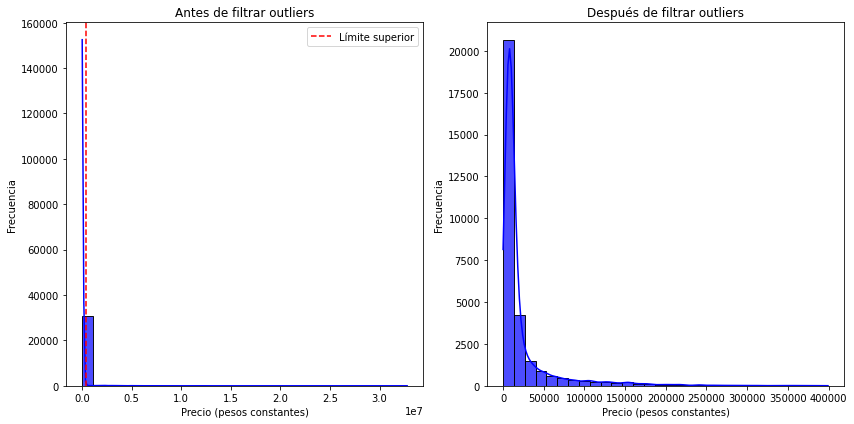

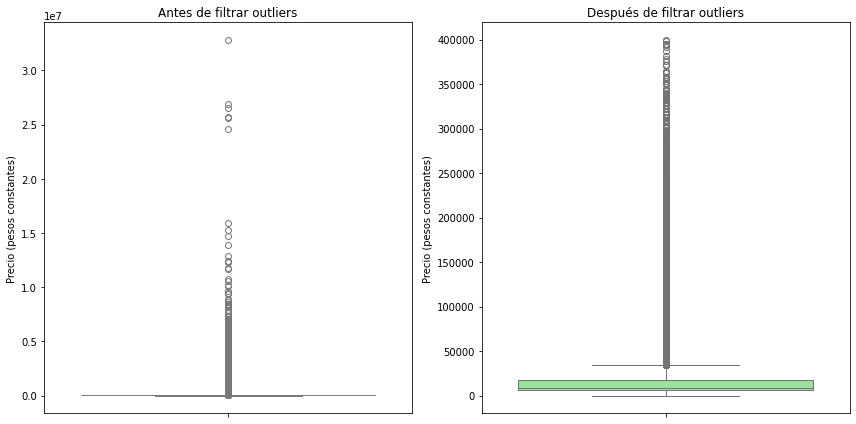

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
file_path = "/home/linar/Desktop/ML/Clases/i302/Proyecto_Final/Mercado_Libre/Data/OFFICIAL/alquiler_AMBA_test.csv"
df = pd.read_csv(file_path)

# Definir el límite superior manualmente
upper_bound = 0.4 * 1e6  # 300,000

# Filtrar los datos dentro del límite
filtered_df = df[df['precio_pesos_constantes'] <= upper_bound]

# Mostrar información sobre los datos
print(f"Cantidad de datos originales: {len(df)}")
print(f"Cantidad de datos después de filtrar: {len(filtered_df)}")

# Graficar la distribución antes y después
plt.figure(figsize=(12, 6))

# Histograma antes de filtrar
plt.subplot(1, 2, 1)
sns.histplot(df['precio_pesos_constantes'], bins=30, kde=True, color='blue', alpha=0.7)
plt.axvline(upper_bound, color='red', linestyle='--', label='Límite superior')
plt.title('Antes de filtrar outliers')
plt.xlabel('Precio (pesos constantes)')
plt.ylabel('Frecuencia')
plt.legend()

# Histograma después de filtrar
plt.subplot(1, 2, 2)
sns.histplot(filtered_df['precio_pesos_constantes'], bins=30, kde=True, color='blue', alpha=0.7)
plt.title('Después de filtrar outliers')
plt.xlabel('Precio (pesos constantes)')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# Boxplots individuales
plt.figure(figsize=(12, 6))

# Boxplot antes de filtrar
plt.subplot(1, 2, 1)
sns.boxplot(y=df['precio_pesos_constantes'], color='lightblue')
plt.title('Antes de filtrar outliers')
plt.ylabel('Precio (pesos constantes)')

# Boxplot después de filtrar
plt.subplot(1, 2, 2)
sns.boxplot(y=filtered_df['precio_pesos_constantes'], color='lightgreen')
plt.title('Después de filtrar outliers')
plt.ylabel('Precio (pesos constantes)')

plt.tight_layout()
plt.show()

In [2]:
filtered_df.describe()

,id_grid,STotalM2,SConstrM2,Dormitorios,Banos,Ambientes,Cocheras,PistaJogging,Lobby,LocalesComerciales,AreaParrillas,LONGITUDE,LATITUDE,precio_pesos_constantes,year
count,30481.000000,3.047900e+04,3.047900e+04,30481.000000,30481.000000,30481.000000,30481.000000,20589.0,20589.0,20589.0,27842.000000,30481.000000,30481.000000,30481.000000,30481.000000
mean,59940.879564,3.487894e+03,3.444561e+03,1.417932,1.329517,2.394639,0.424264,0.0,0.0,0.0,0.037066,-58.481256,-34.597346,23442.210200,2021.481940
std,14631.231187,5.729022e+05,5.728678e+05,1.173484,0.817748,1.512740,5.960851,0.0,0.0,0.0,0.188928,0.114422,0.080927,40667.023369,0.499682
min,131.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,-58.870314,-34.923504,45.249847,2021.000000
25%,53814.000000,3.800000e+01,3.600000e+01,1.000000,1.000000,2.000000,0.000000,0.0,0.0,0.0,0.000000,-58.543329,-34.631223,6550.451262,2021.000000
50%,60084.000000,5.000000e+01,4.600000e+01,1.000000,1.000000,2.000000,0.000000,0.0,0.0,0.0,0.000000,-58.449956,-34.597858,9032.339424,2021.000000
75%,65665.000000,7.700000e+01,7.000000e+01,2.000000,1.000000,3.000000,1.000000,0.0,0.0,0.0,0.000000,-58.402277,-34.566497,17624.062629,2022.000000
max,97826.000000,1.000000e+08,1.000000e+08,99.000000,35.000000,112.000000,1000.000000,0.0,0.0,0.0,1.000000,-58.161115,-34.386480,399391.580946,2022.000000


In [3]:
filtered_df.to_csv("/home/linar/Desktop/ML/Clases/i302/Proyecto_Final/Mercado_Libre/Data/OFFICIAL/TEST_SET_TO_UPLOAD/alquiler_AMBA_test+target.csv", index=False)

In [4]:
filtered_df = filtered_df.drop(columns="precio_pesos_constantes")
filtered_df.head()

,id_grid,MesListing,TIPOPROPIEDAD,STotalM2,SConstrM2,Dormitorios,Banos,Ambientes,SitioOrigen,Amoblado,...,AreaParrillas,CanchaTennis,AreaCine,ITE_ADD_CITY_NAME,ITE_ADD_STATE_NAME,ITE_ADD_NEIGHBORHOOD_NAME,ITE_TIPO_PROD,LONGITUDE,LATITUDE,year
0,57427,2022-09-01,Departamento,38.0,38.0,1,1,2,NaN,0.0,...,0.0,NaN,NaN,Capital Federal,Capital Federal,Villa del Parque,N,-58.481301,-34.611180,2022
1,53483,2021-10-01,Departamento,33.0,33.0,1,1,2,0,0,...,0.0,0,0,Capital Federal,Capital Federal,Floresta,U,-58.472960,-34.632921,2021
2,53858,2022-06-01,Departamento,78.0,78.0,2,2,3,NaN,NaN,...,NaN,NaN,NaN,Capital Federal,Capital Federal,Barracas,U,-58.372587,-34.632289,2022
3,73216,2022-12-01,Departamento,37.0,35.0,1,1,2,NaN,NaN,...,NaN,NaN,NaN,Vicente López,Bs.As. G.B.A. Norte,Florida,U,-58.486302,-34.524556,2022
4,68619,2022-07-01,Departamento,42.0,36.0,0,1,1,NaN,0,...,0.0,NaN,NaN,Capital Federal,Capital Federal,Núñez,U,-58.467139,-34.550035,2022


In [5]:
filtered_df.to_csv("/home/linar/Desktop/ML/Clases/i302/Proyecto_Final/Mercado_Libre/Data/OFFICIAL/TEST_SET_TO_UPLOAD/alquiler_AMBA_test.csv", index=False)